In [1]:
import torch
import numpy as np
import sys
import os

sys.path.append(os.getcwd()+'/../src/')
%load_ext autoreload
%autoreload 2

from attribute import *
from plot import *
from ppo_policy import *
from utils import *

/Users/amalota/anaconda3/envs/py37_trainloop/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [25]:
from stable_baselines3 import PPO

In [ ]:
BASE_PATH = '../../best_model'

In [41]:
# model = PPO.load(f'{BASE_PATH}/ppo/MlpPolicy/best_model.zip')
model = PPO.load('../output_models/ppo/MlpPolicy/2022-06-16_22_41_02_12.zip')
model = PPO.load('../output_models/ppo/MlpPolicy/2022-06-09_13_09_03_12.zip')
X = np.load(f'{BASE_PATH}/ppo/MlpPolicy/observations.npy')
X = torch.Tensor(X)
X.shape

torch.Size([4353, 1, 7])

In [42]:
predictions = []
for _ in X:
    predictions.append(model.predict(X[0])[0][0])
predictions = np.array(predictions)

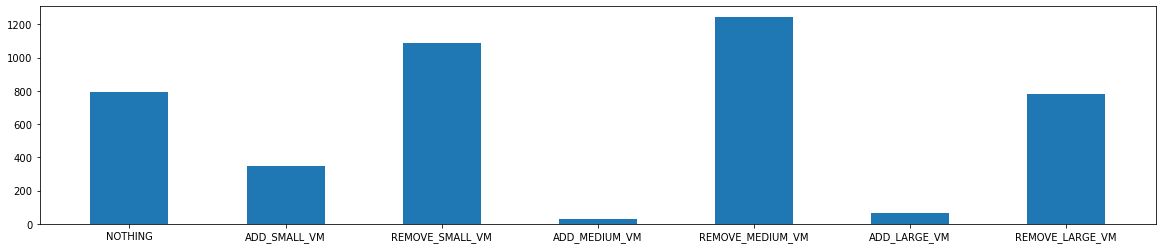

In [43]:
plot_action_histogram(predictions)

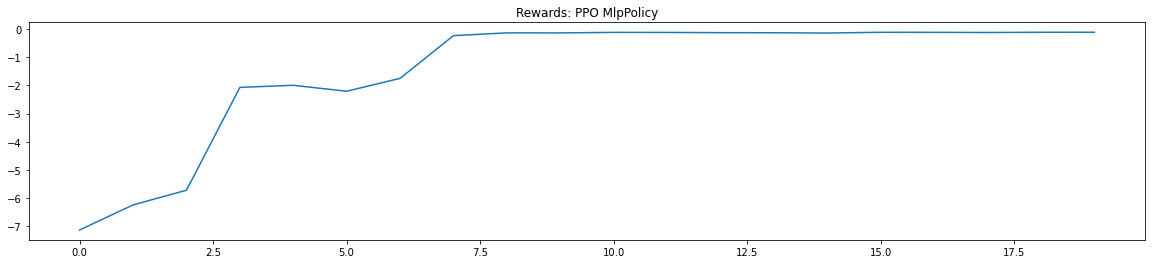

In [45]:
plot_training_data(f'{BASE_PATH}/ppo/MlpPolicy/best_model_rewards.csv', data_type='reward', title='PPO MlpPolicy')

In [46]:
from ppo_policy import PPOPolicy
ppo_net = PPOPolicy(model.observation_space, model.action_space, model.lr_schedule, model)

In [47]:
x = torch.tensor(X[0])
ppo_net.forward(x)

/Users/amalota/anaconda3/envs/py37_trainloop/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  """Entry point for launching an IPython kernel.


tensor([[-1.2951]], grad_fn=<AddmmBackward0>)

In [50]:
N = 500
idxs = np.random.choice(np.arange(X.shape[0]), size=N)
X_sample = X[idxs]
predictions_sample = predictions[idxs]

X_sample = X[N+40:2*(N+40)]
predictions_sample = predictions[N+40:2*(N+40)]

ig_attributor = IGAttributor(net=ppo_net,
                            policy='mlp',
                            agent='ppo',
                            data=X_sample,
                            predictions=predictions_sample)

In [49]:
# plot_mean_attributions(mean_attributions=mean_attributions)

Action made: REMOVE_LARGE_VM


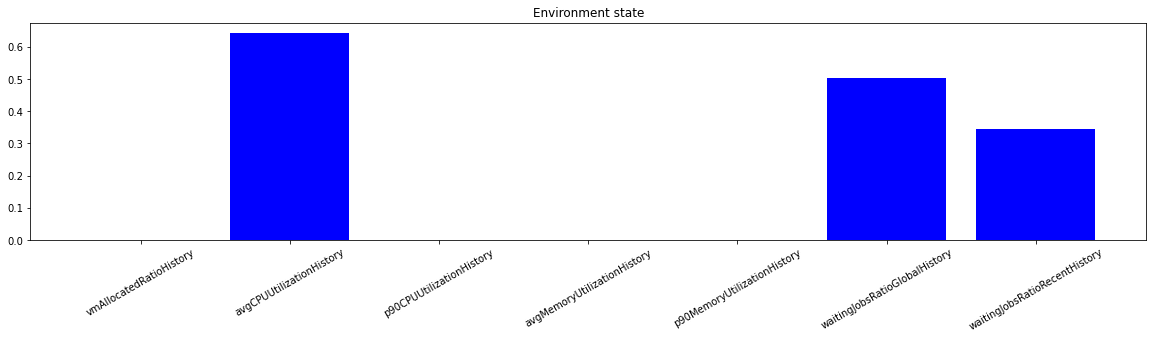

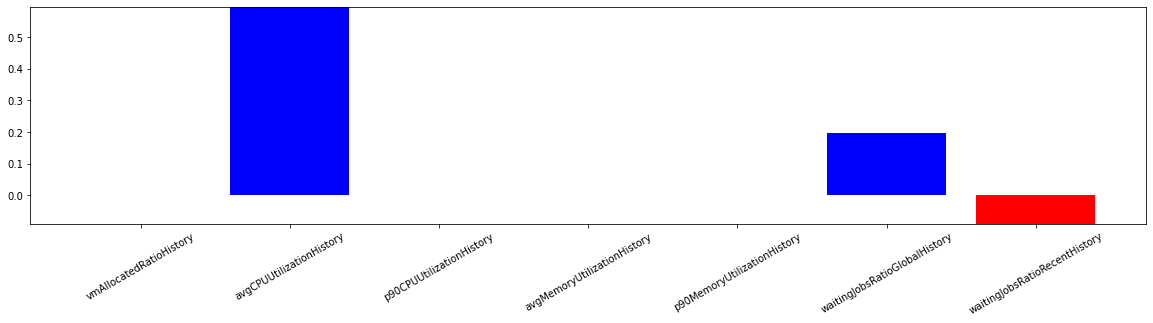

In [55]:
ig_attributor.explain_example(idx=150)

Action made: REMOVE_LARGE_VM


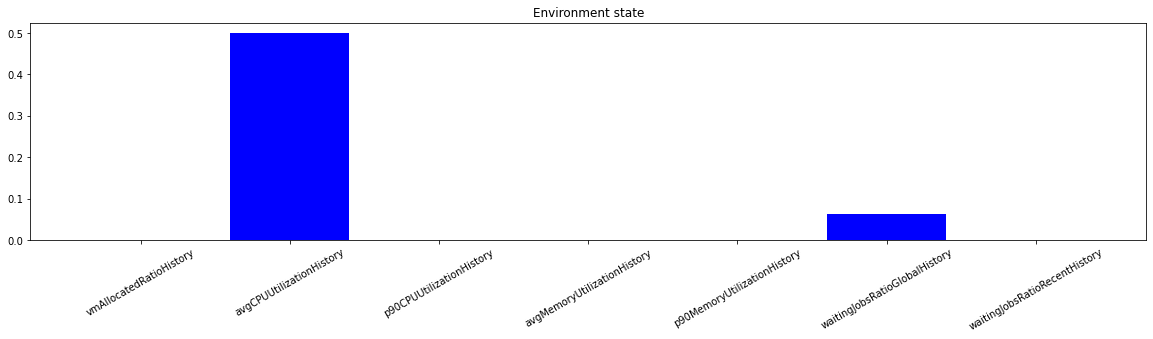

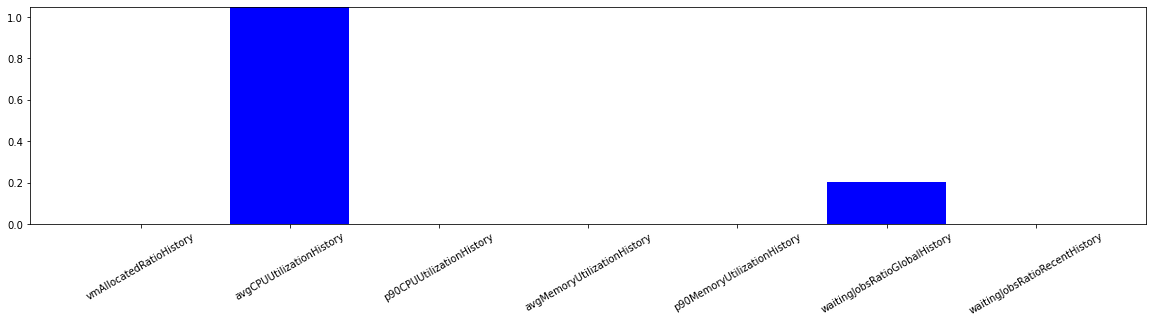

In [56]:
ig_attributor.explain_example(idx=48)

In [57]:
action_observation_map = get_action_observation_map(predictions)

Observation count for each action:
{'ADD_LARGE_VM': 63,
 'ADD_MEDIUM_VM': 31,
 'ADD_SMALL_VM': 347,
 'NOTHING': 796,
 'REMOVE_LARGE_VM': 780,
 'REMOVE_MEDIUM_VM': 1246,
 'REMOVE_SMALL_VM': 1090}


In [59]:
idx = action_observation_map['ADD_LARGE_VM'].squeeze(1)[:500]

In [60]:
ig_attributor = IGAttributor(net=ppo_net,
                            policy='mlp',
                            agent='ppo',
                            data=X[idx],
                            predictions=predictions[idx])

Action made: ADD_LARGE_VM


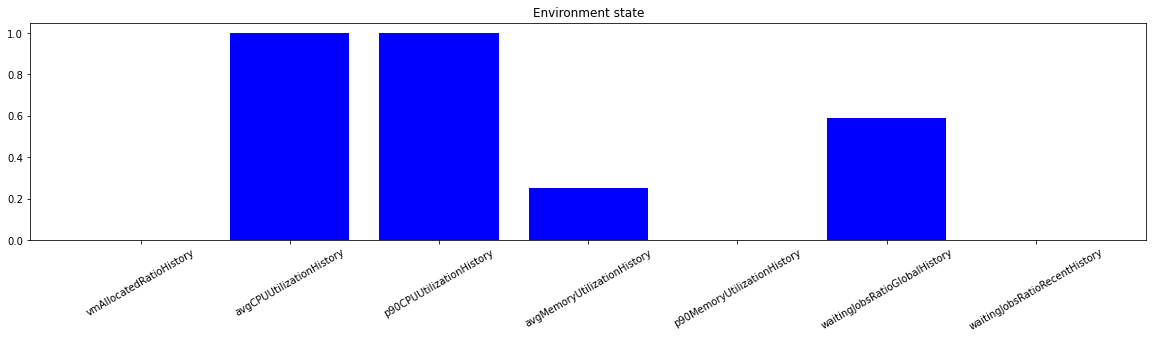

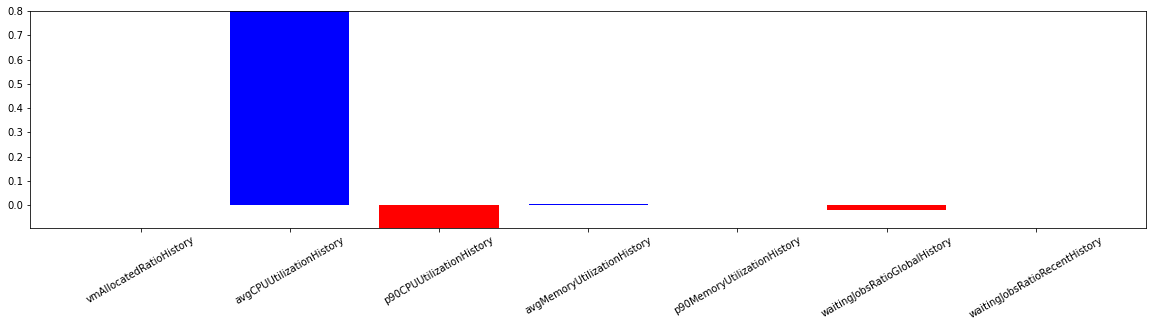

In [61]:
ig_attributor.explain_example(idx=1)

Action made: ADD_LARGE_VM


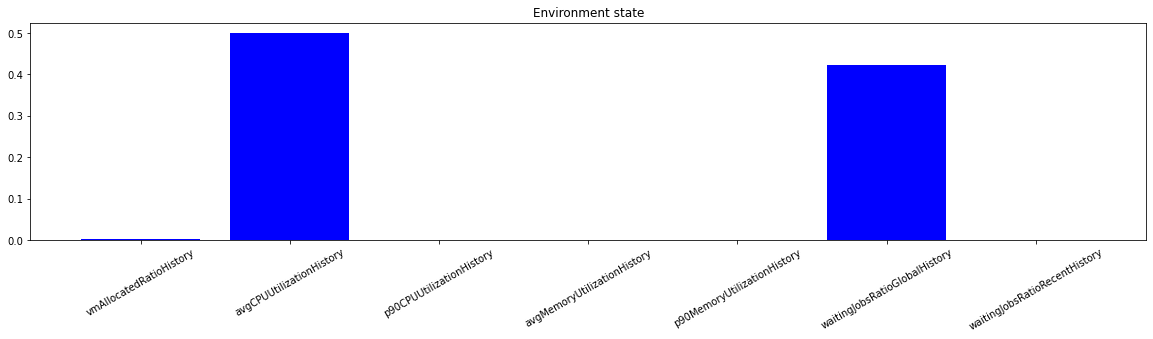

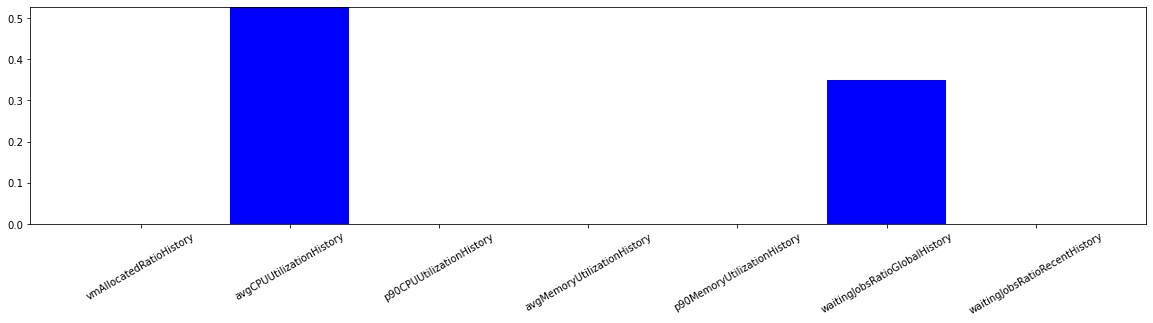

In [62]:
ig_attributor.explain_example(idx=10)

In [63]:
X_manual = torch.Tensor([
    [[0, 1, 1, 1, 1, 1, 1]],
    [[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]],
    [[0, 1, 1, 0, 0, 1, 1]],
    [[0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01]]
    ])
    
predictions_manual = []
for _ in X_manual:
    predictions_manual.append(model.predict(X_manual[0])[0][0])
predictions_manual = np.array(predictions_manual)

In [64]:
ig_attributor = IGAttributor(net=ppo_net,
                            policy='mlp',
                            agent='ppo',
                            data=X_manual,
                            predictions=predictions_manual)

Action made: ADD_SMALL_VM


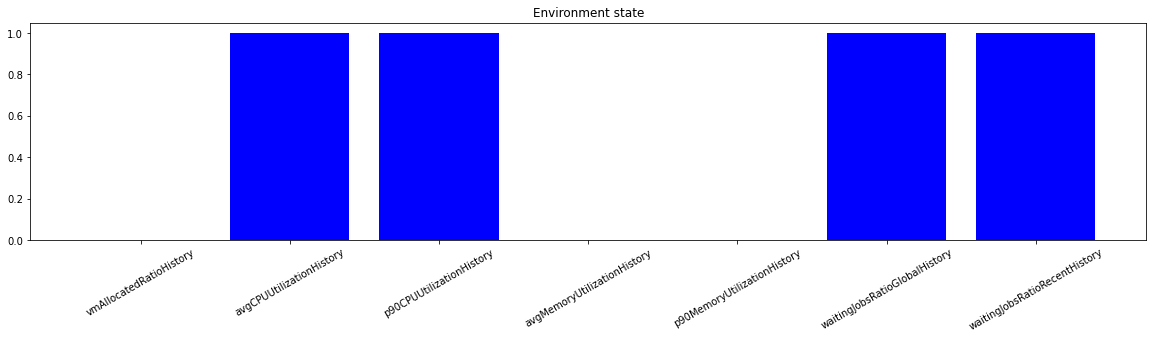

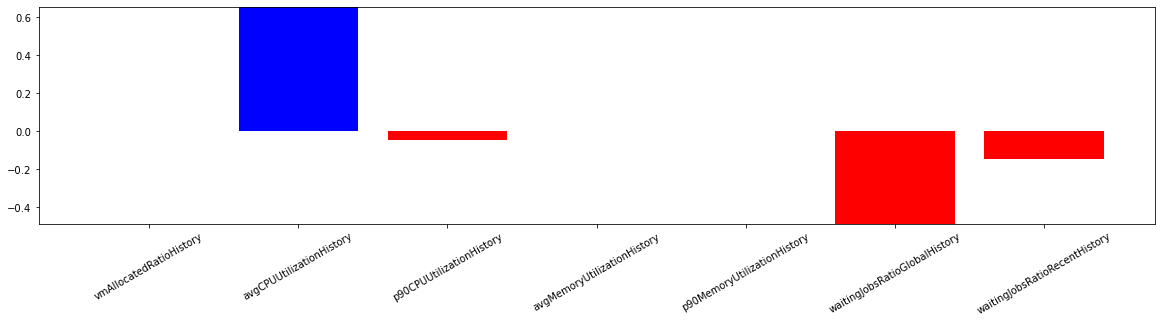

In [65]:
ig_attributor.explain_example(idx=2)

Action made: ADD_SMALL_VM


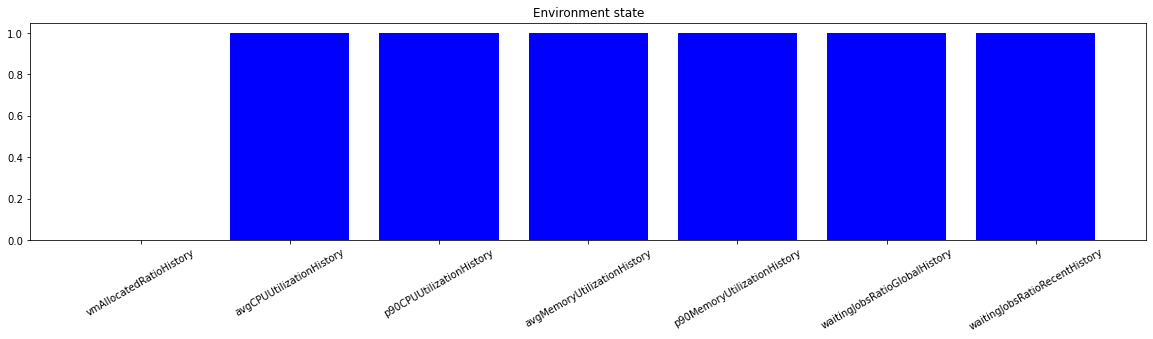

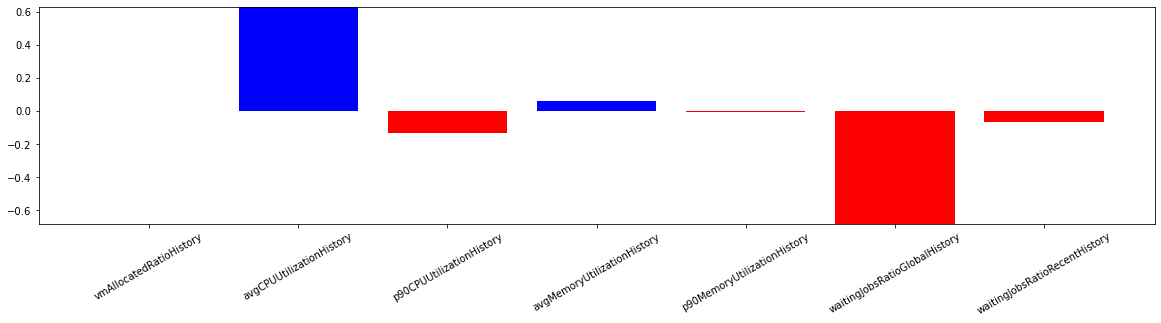

In [66]:
ig_attributor.explain_example(idx=0)